In [142]:
#get the data to process it and use it!
import pandas as pd 
import numpy as np
import random as rnd
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [143]:
f = open("training.txt", "r")
sample = []
img_raw = []
for images in f:
    img = images.strip().split(" ")
    change_type = img[0].split(",")
    change_type_int = []
    for i in range(len(change_type)):
        change_type_int.append(int(change_type[i]))
        #print(change_type_int[1])
        #change_type_int.remove()
        img_raw.append(change_type_int)
sample.append(img_raw[20].pop(-1))
sample

[0]

In [144]:
sample.append(img_raw[3012].pop(-1))
sample

[0, 4]

In [145]:
label = []
from collections import deque
lists = deque()
print(len(img_raw))
c = 0

248495


In [146]:
labesls = []
for j in range(len(img_raw)):
    if (len(img_raw[j]) == 65):
        c = c +1
        labesls.append(img_raw[j][-1])
        img_raw[j].pop(-1)
        lists.append(img_raw[j])
print(c)   
print(len(labesls))

3821
3821


In [147]:
labesls

[0,
 7,
 4,
 6,
 2,
 5,
 5,
 0,
 8,
 7,
 1,
 9,
 5,
 3,
 0,
 4,
 7,
 8,
 4,
 7,
 8,
 5,
 9,
 1,
 2,
 0,
 6,
 1,
 8,
 7,
 0,
 7,
 6,
 9,
 1,
 9,
 3,
 9,
 4,
 9,
 2,
 1,
 9,
 9,
 6,
 3,
 2,
 8,
 2,
 7,
 1,
 4,
 6,
 2,
 0,
 4,
 6,
 3,
 7,
 1,
 0,
 2,
 2,
 5,
 2,
 4,
 8,
 1,
 7,
 3,
 0,
 3,
 3,
 7,
 7,
 9,
 1,
 3,
 3,
 4,
 3,
 4,
 2,
 8,
 8,
 9,
 8,
 4,
 7,
 1,
 6,
 9,
 4,
 0,
 1,
 3,
 6,
 2,
 4,
 7,
 4,
 0,
 2,
 8,
 5,
 1,
 0,
 1,
 9,
 6,
 9,
 6,
 9,
 5,
 4,
 5,
 9,
 5,
 7,
 1,
 3,
 7,
 0,
 2,
 0,
 4,
 8,
 2,
 3,
 5,
 3,
 3,
 4,
 5,
 8,
 9,
 6,
 1,
 2,
 0,
 0,
 6,
 2,
 7,
 6,
 4,
 6,
 1,
 1,
 4,
 5,
 2,
 8,
 8,
 9,
 3,
 0,
 8,
 4,
 7,
 6,
 2,
 2,
 4,
 6,
 4,
 4,
 8,
 2,
 1,
 2,
 3,
 2,
 5,
 7,
 9,
 9,
 5,
 1,
 3,
 9,
 2,
 5,
 0,
 4,
 7,
 5,
 8,
 1,
 0,
 2,
 4,
 2,
 0,
 8,
 4,
 5,
 7,
 7,
 9,
 7,
 2,
 1,
 7,
 7,
 4,
 1,
 9,
 2,
 6,
 9,
 6,
 9,
 4,
 9,
 0,
 5,
 7,
 3,
 8,
 4,
 0,
 3,
 1,
 5,
 8,
 5,
 9,
 3,
 7,
 8,
 3,
 8,
 0,
 8,
 5,
 7,
 6,
 9,
 1,
 1,
 7,
 8,
 4,
 2,
 3,
 2,
 5,
 1,
 7,


In [151]:
X = np.array(lists)

In [152]:
y = np.array(labesls)

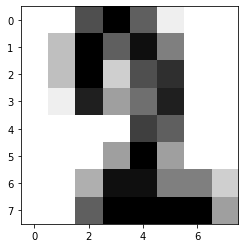

In [153]:
plt.imshow(X[4].reshape(8,8), cmap = 'binary')

In [154]:
y[4]

2

In [155]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=2, stratify=y)

In [156]:
#svm
svm = SVC(kernel = 'linear', gamma= 0.1, C=10)
svm.fit(X_train,y_train)

SVC(C=10, gamma=0.1, kernel='linear')

In [157]:
svm.score(X_test, y_test)

0.9803921568627451

In [158]:
from sklearn.metrics import classification_report 
predictions = svm.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       0.96      0.95      0.95        78
           2       1.00      1.00      1.00        76
           3       0.99      1.00      0.99        78
           4       0.97      1.00      0.99        77
           5       0.97      1.00      0.99        75
           6       0.99      0.99      0.99        75
           7       1.00      0.97      0.99        78
           8       0.95      0.93      0.94        76
           9       0.97      0.96      0.97        77

    accuracy                           0.98       765
   macro avg       0.98      0.98      0.98       765
weighted avg       0.98      0.98      0.98       765



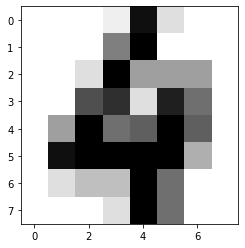

In [161]:
plt.imshow(X_test[5].reshape(8,8), cmap = 'binary')

In [162]:
predictions[5]

4